In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_features=5,n_redundant=0,n_informative=5,n_clusters_per_class=1)

In [4]:
X

array([[ 1.15667196,  1.31365523,  1.29616738,  2.0181067 ,  1.57330959],
       [-1.88356996,  0.37419417,  1.7793862 , -0.3709668 ,  1.94647567],
       [ 0.31113115,  0.27572273,  1.04030804,  1.32081585, -0.26642074],
       [-1.6518388 ,  1.30655914,  1.19786064,  1.0402674 ,  0.09136017],
       [-0.57066864,  1.48053348,  0.68064555,  1.4394523 , -1.35296727],
       [ 1.27814937,  1.72459984,  0.93881374,  2.91223145, -0.36081451],
       [ 0.28755225,  1.04188914,  0.72477178,  2.47038752,  0.87375073],
       [-0.86597717, -1.84375458,  0.53878789,  1.13726004, -0.57378604],
       [ 0.4860678 ,  4.67859194,  0.20269469,  2.37361926, -0.38024945],
       [-1.55903967,  1.51799532, -0.43464864,  0.32300754, -2.48648303],
       [ 1.29538765,  0.69047705,  0.57792031,  1.47771751,  2.55184476],
       [-1.05878482,  1.08994234,  1.09573701, -0.95245129, -1.49376078],
       [ 1.52011817,  1.01455191,  1.07406733,  0.30377601,  0.66649181],
       [ 2.43930224,  1.49815635,  0.9

In [5]:
df=pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
df.head()

,col1,col2,col3,col4,col5,target
0,1.156672,1.313655,1.296167,2.018107,1.573310,0
1,-1.883570,0.374194,1.779386,-0.370967,1.946476,1
2,0.311131,0.275723,1.040308,1.320816,-0.266421,0
3,-1.651839,1.306559,1.197861,1.040267,0.091360,1
4,-0.570669,1.480533,0.680646,1.439452,-1.352967,1


In [6]:
df.shape

(100, 6)

In [35]:
#function for row sampling
def sample_rows(df,percent):
    num_rows = int(percent* df.shape[0])
    sampled_rows = df.sample(n=num_rows, axis=0, replace=True)
    return sampled_rows

In [182]:
# Function for feature (column) sampling
def sample_features(df, percent):
    num_features = int(percent * (df.shape[1]-1))  # Calculate number of features to sample
    # Exclude the target column from the features
    feature_columns = [col for col in df.columns if col != 'target']
    sampled_df = df[feature_columns].sample(n=num_features, axis=1)  # Sample columns
    sampled_df['target']=df['target']
    return sampled_df

In [185]:
sample_features(df,0.5)

,col1,col2,target
0,1.156672,1.313655,0
1,-1.883570,0.374194,1
2,0.311131,0.275723,0
3,-1.651839,1.306559,1
4,-0.570669,1.480533,1
...,...,...,...
95,0.019080,1.078320,0
96,-1.330657,-2.056267,1
97,-2.736924,0.390539,1
98,-0.894341,1.727928,1


In [193]:
#combined sampling
def combined_sampling(df,row_p,col_p):
    # Calculate the number of rows and columns to sample
    num_rows = int(row_p* df.shape[0])
    num_columns = int(col_p * (df.shape[1]-1))

    # Sample rows
    sampled_rows = df.sample(n=num_rows, axis=0, replace=True)
    
    # Exclude the target column from the features
    feature_columns = [col for col in df.columns if col != 'target']

    # Sample columns
    sampled_df= sampled_rows[feature_columns].sample(n=num_columns, axis=1, replace=True)
    sampled_df['target']=sampled_rows['target']

    return sampled_df


In [194]:
combined_sampling(df,0.5,0.5)

,col2,col4,target
84,2.360571,1.908542,0
21,-0.087874,0.319355,1
66,2.677770,-1.642729,1
47,0.659806,0.242308,0
77,3.247516,1.932113,1
9,1.517995,0.323008,1
56,0.737772,1.570320,1
15,1.427554,0.524704,0
69,-0.215559,-2.986781,1
88,2.399347,1.070046,0


In [21]:
df1=sample_rows(df,0.1)

In [22]:
df2=sample_rows(df,0.1)
df3=sample_rows(df,0.1)

In [23]:
df2.shape

(10, 6)

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [25]:
clf1.fit(df1.drop(columns=['target']),df1['target'])
clf2.fit(df2.drop(columns=['target']),df2['target'])
clf3.fit(df3.drop(columns=['target']),df3['target'])

DecisionTreeClassifier()

In [26]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.198\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 0.597\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

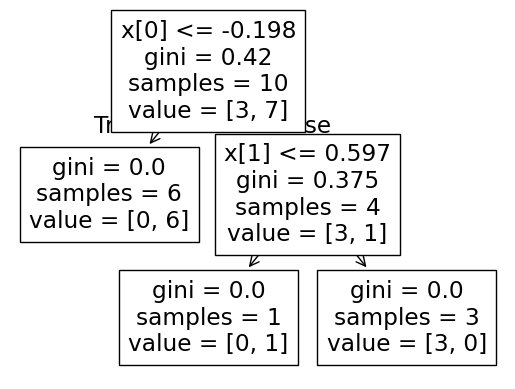

In [27]:
plot_tree(clf1)

[Text(0.4, 0.8333333333333334, 'x[0] <= -0.435\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 0.528\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]')]

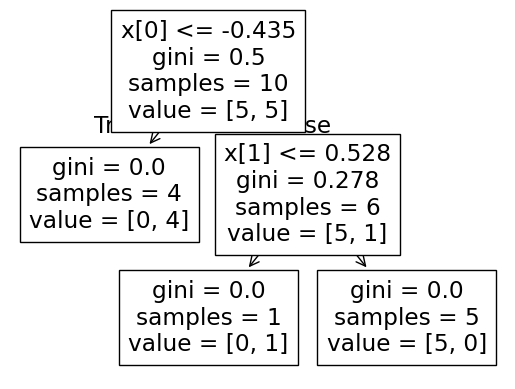

In [28]:
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[4] <= -0.734\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4, 0.5, 'x[2] <= 2.161\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7, 0.6666666666666667, '  False')]

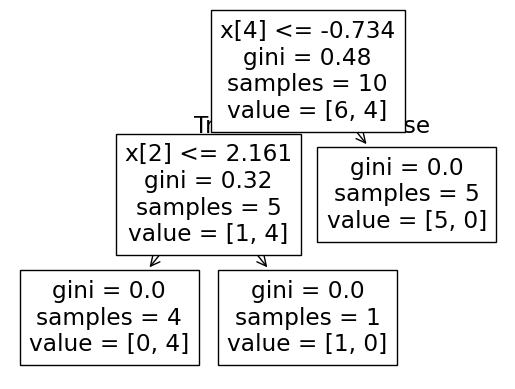

In [29]:
plot_tree(clf3)

In [32]:
clf1.predict(np.array([1.1566721,1.313655,1.296167,2.018107,1.573310]).reshape(1,5))

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [33]:
clf2.predict(np.array([1.1566721,1.313655,1.296167,2.018107,1.573310]).reshape(1,5))

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [34]:
clf3.predict(np.array([1.1566721,1.313655,1.296167,2.018107,1.573310]).reshape(1,5))

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

Now do for both sample_features and combined_features

In [198]:
df1=sample_features(df,0.8)
df2=sample_features(df,0.8)
df3=sample_features(df,0.8)

In [210]:
df1=combined_sampling(df,0.5,0.5)
df2=combined_sampling(df,0.5,0.5)
df3=combined_sampling(df,0.5,0.5)

In [211]:
df2

,col3,col1,target
38,0.474208,1.429258,0
99,2.626010,-1.118141,0
0,1.296167,1.156672,0
69,-0.766698,-1.418101,1
50,-1.930003,-0.386052,1
40,-1.554960,-1.438436,1
88,0.261044,2.540468,0
23,1.784972,0.045365,1
50,-1.930003,-0.386052,1
65,0.956221,-1.681874,0


In [212]:
df1.shape

(50, 3)

In [213]:
from sklearn.tree import DecisionTreeClassifier
clf1=DecisionTreeClassifier()
clf2=DecisionTreeClassifier()
clf3=DecisionTreeClassifier()

In [214]:
clf1.fit(df1.drop(columns=['target']),df1['target'])
clf2.fit(df2.drop(columns=['target']),df2['target'])
clf3.fit(df3.drop(columns=['target']),df3['target'])

DecisionTreeClassifier()

[Text(0.36666666666666664, 0.9285714285714286, 'x[1] <= 0.395\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2, 0.7857142857142857, 'x[0] <= 1.109\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.2833333333333333, 0.8571428571428572, 'True  '),
 Text(0.13333333333333333, 0.6428571428571429, 'x[0] <= 0.554\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.06666666666666667, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.26666666666666666, 0.6428571428571429, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.5333333333333333, 0.7857142857142857, 'x[1] <= 1.152\ngini = 0.478\nsamples = 38\nvalue = [23, 15]'),
 Text(0.44999999999999996, 0.8571428571428572, '  False'),
 Text(0.4, 0.6428571428571429, 'x[0] <= 2.79\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= -0.271\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.26666666666666666, 0.35714285714285715

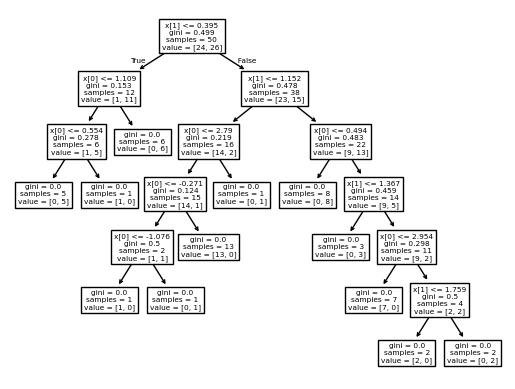

In [215]:
plot_tree(clf1)

[Text(0.5769230769230769, 0.9285714285714286, 'x[1] <= 0.898\ngini = 0.471\nsamples = 50\nvalue = [19, 31]'),
 Text(0.5, 0.7857142857142857, 'x[0] <= 0.948\ngini = 0.387\nsamples = 42\nvalue = [11, 31]'),
 Text(0.5384615384615384, 0.8571428571428572, 'True  '),
 Text(0.4230769230769231, 0.6428571428571429, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]'),
 Text(0.5769230769230769, 0.6428571428571429, 'x[1] <= -0.672\ngini = 0.5\nsamples = 22\nvalue = [11, 11]'),
 Text(0.3076923076923077, 0.5, 'x[0] <= 2.244\ngini = 0.459\nsamples = 14\nvalue = [9, 5]'),
 Text(0.15384615384615385, 0.35714285714285715, 'x[0] <= 1.089\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.07692307692307693, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.21428571428571427, 'x[1] <= -0.801\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.15384615384615385, 0.07142857142857142, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3076923076923077, 0.07142857142857

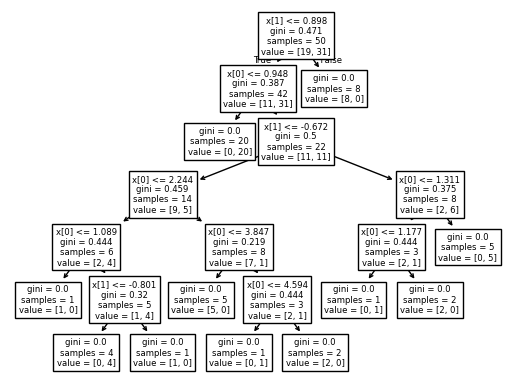

In [216]:
plot_tree(clf2)

[Text(0.38235294117647056, 0.9444444444444444, 'x[0] <= 1.204\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.11764705882352941, 0.8333333333333334, 'x[0] <= -0.831\ngini = 0.363\nsamples = 21\nvalue = [16, 5]'),
 Text(0.25, 0.8888888888888888, 'True  '),
 Text(0.058823529411764705, 0.7222222222222222, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.17647058823529413, 0.7222222222222222, 'x[1] <= -1.037\ngini = 0.266\nsamples = 19\nvalue = [16, 3]'),
 Text(0.11764705882352941, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.23529411764705882, 0.6111111111111112, 'x[1] <= 1.381\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(0.17647058823529413, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.29411764705882354, 0.5, 'x[0] <= -0.087\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.23529411764705882, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.35294117647058826, 0.3888888888888889, 'x[1] <= 1.489\ngini = 

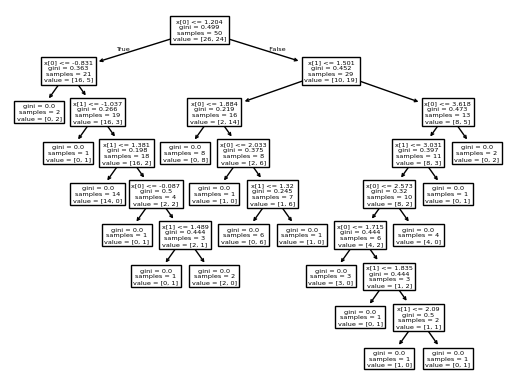

In [217]:
plot_tree(clf3)

In [219]:
clf1.predict(np.array([1.833451,	-0.717671	]).reshape(1,2))

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [220]:
clf2.predict(np.array([1.833451,	-0.717671	]).reshape(1,2))

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [221]:
clf3.predict(np.array([1.833451,	-0.717671	]).reshape(1,2))

c:\Users\acer\Desktop\Machine_learning\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])